## Correlation Analysis on Vort/Precip Anomalies and other Statistical Tests
### September 12th, 2022

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
#from intake import open_catalog
import cartopy.io.shapereader as shpreader
#import mygrads as mg
#import Ngl
#import Nio
#import fiona
import matplotlib as mpl
import pymannkendall as mk

### I. Precipitation

In [47]:
DS_0_precip=xr.open_dataset('/project/xprecip/merra2_ncfiles/precip/anomalies/norm_anoms_precip_00z.nc')
DS_0_precip

<xarray.Dataset>
Dimensions:                        (lat: 55, lon: 107, time: 3760)
Coordinates:
  * time                           (time) datetime64[ns] 1980-01-01 ... 2021-...
  * lon                            (lon) float64 -126.9 -126.2 ... -61.25 -60.62
  * lat                            (lat) float64 23.0 23.5 24.0 ... 49.5 50.0
Data variables:
    __xarray_dataarray_variable__  (time, lat, lon) float64 ...

In [48]:
precip_00z=DS_0_precip['__xarray_dataarray_variable__']
precip_00z

<xarray.DataArray '__xarray_dataarray_variable__' (time: 3760, lat: 55, lon: 107)>
[22127600 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2021-02-28
  * lon      (lon) float64 -126.9 -126.2 -125.6 -125.0 ... -61.88 -61.25 -60.62
  * lat      (lat) float64 23.0 23.5 24.0 24.5 25.0 ... 48.0 48.5 49.0 49.5 50.0

In [49]:
DS_6_precip=xr.open_dataset('/project/xprecip/merra2_ncfiles/precip/anomalies/norm_anoms_precip_06z.nc')
DS_6_precip

<xarray.Dataset>
Dimensions:                        (lat: 55, lon: 107, time: 3760)
Coordinates:
  * time                           (time) datetime64[ns] 1980-01-01T06:00:00 ...
  * lon                            (lon) float64 -126.9 -126.2 ... -61.25 -60.62
  * lat                            (lat) float64 23.0 23.5 24.0 ... 49.5 50.0
Data variables:
    __xarray_dataarray_variable__  (time, lat, lon) float64 ...

In [50]:
precip_06z=DS_6_precip['__xarray_dataarray_variable__']
precip_06z

<xarray.DataArray '__xarray_dataarray_variable__' (time: 3760, lat: 55, lon: 107)>
[22127600 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01T06:00:00 ... 2021-02-28T06:00:00
  * lon      (lon) float64 -126.9 -126.2 -125.6 -125.0 ... -61.88 -61.25 -60.62
  * lat      (lat) float64 23.0 23.5 24.0 24.5 25.0 ... 48.0 48.5 49.0 49.5 50.0

In [51]:
print(np.nanmax(precip_06z))
print(np.nanmin(precip_06z))
print(np.nanmean(precip_06z))

92.76626194804452
-46.38313499836197
2.345113906475192e-05


In [52]:
DS_12_precip=xr.open_dataset('/project/xprecip/merra2_ncfiles/precip/anomalies/norm_anoms_precip_12z.nc')
DS_12_precip

<xarray.Dataset>
Dimensions:                        (lat: 55, lon: 107, time: 3760)
Coordinates:
  * time                           (time) datetime64[ns] 1980-01-01T12:00:00 ...
  * lon                            (lon) float64 -126.9 -126.2 ... -61.25 -60.62
  * lat                            (lat) float64 23.0 23.5 24.0 ... 49.5 50.0
Data variables:
    __xarray_dataarray_variable__  (time, lat, lon) float64 ...

In [53]:
precip_12z=DS_12_precip['__xarray_dataarray_variable__']
precip_12z

<xarray.DataArray '__xarray_dataarray_variable__' (time: 3760, lat: 55, lon: 107)>
[22127600 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01T12:00:00 ... 2021-02-28T12:00:00
  * lon      (lon) float64 -126.9 -126.2 -125.6 -125.0 ... -61.88 -61.25 -60.62
  * lat      (lat) float64 23.0 23.5 24.0 24.5 25.0 ... 48.0 48.5 49.0 49.5 50.0

In [54]:
DS_18_precip=xr.open_dataset('/project/xprecip/merra2_ncfiles/precip/anomalies/norm_anoms_precip_18z.nc')
DS_18_precip

<xarray.Dataset>
Dimensions:                        (lat: 55, lon: 107, time: 3760)
Coordinates:
  * time                           (time) datetime64[ns] 1980-01-01T18:00:00 ...
  * lon                            (lon) float64 -126.9 -126.2 ... -61.25 -60.62
  * lat                            (lat) float64 23.0 23.5 24.0 ... 49.5 50.0
Data variables:
    __xarray_dataarray_variable__  (time, lat, lon) float64 ...

In [55]:
precip_18z=DS_18_precip['__xarray_dataarray_variable__']
precip_18z

<xarray.DataArray '__xarray_dataarray_variable__' (time: 3760, lat: 55, lon: 107)>
[22127600 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01T18:00:00 ... 2021-02-28T18:00:00
  * lon      (lon) float64 -126.9 -126.2 -125.6 -125.0 ... -61.88 -61.25 -60.62
  * lat      (lat) float64 23.0 23.5 24.0 24.5 25.0 ... 48.0 48.5 49.0 49.5 50.0

In [56]:
precip_concat=xr.concat([precip_00z,precip_06z,precip_12z,precip_18z],dim='time')
precip_concat.time

<xarray.DataArray 'time' (time: 15040)>
array(['1980-01-01T00:00:00.000000000', '1980-01-02T00:00:00.000000000',
       '1980-01-03T00:00:00.000000000', ..., '2021-02-26T18:00:00.000000000',
       '2021-02-27T18:00:00.000000000', '2021-02-28T18:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2021-02-28T18:00:00

In [57]:
precip_concat_sorted=precip_concat.sortby('time')
precip_concat_sorted

KeyboardInterrupt: 

In [ ]:
precip_concat_sorted

### II. Vorticity

In [ ]:
DS_0=xr.open_dataset('/project/xprecip/merra2_ncfiles/winds/vort_analysis/norm_anoms_vort_00z.nc')
DS_0

In [58]:
vort_00z=DS_0['__xarray_dataarray_variable__']
vort_00z

<xarray.DataArray '__xarray_dataarray_variable__' (time: 3760, lat: 55, lon: 113)>
[23368400 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2021-02-28
  * lon      (lon) float64 -126.2 -125.6 -125.0 -124.4 ... -57.5 -56.88 -56.25
  * lat      (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 49.5 50.0 50.5 51.0 51.5

In [59]:
DS_6=xr.open_dataset('/project/xprecip/merra2_ncfiles/winds/vort_analysis/norm_anoms_vort_06z.nc')
DS_6

<xarray.Dataset>
Dimensions:                        (lat: 55, lon: 113, time: 3760)
Coordinates:
  * time                           (time) datetime64[ns] 1980-01-01T06:00:00 ...
  * lon                            (lon) float64 -126.2 -125.6 ... -56.88 -56.25
  * lat                            (lat) float64 24.5 25.0 25.5 ... 51.0 51.5
Data variables:
    __xarray_dataarray_variable__  (time, lat, lon) float64 ...

In [60]:
vort_06z=DS_6['__xarray_dataarray_variable__']
vort_06z

<xarray.DataArray '__xarray_dataarray_variable__' (time: 3760, lat: 55, lon: 113)>
[23368400 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01T06:00:00 ... 2021-02-28T06:00:00
  * lon      (lon) float64 -126.2 -125.6 -125.0 -124.4 ... -57.5 -56.88 -56.25
  * lat      (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 49.5 50.0 50.5 51.0 51.5

In [61]:
DS_12=xr.open_dataset('/project/xprecip/merra2_ncfiles/winds/vort_analysis/norm_anoms_vort_12z.nc')
DS_12

<xarray.Dataset>
Dimensions:                        (lat: 55, lon: 113, time: 3760)
Coordinates:
  * time                           (time) datetime64[ns] 1980-01-01T12:00:00 ...
  * lon                            (lon) float64 -126.2 -125.6 ... -56.88 -56.25
  * lat                            (lat) float64 24.5 25.0 25.5 ... 51.0 51.5
Data variables:
    __xarray_dataarray_variable__  (time, lat, lon) float64 ...

In [62]:
vort_12z=DS_12['__xarray_dataarray_variable__']
vort_12z

<xarray.DataArray '__xarray_dataarray_variable__' (time: 3760, lat: 55, lon: 113)>
[23368400 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01T12:00:00 ... 2021-02-28T12:00:00
  * lon      (lon) float64 -126.2 -125.6 -125.0 -124.4 ... -57.5 -56.88 -56.25
  * lat      (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 49.5 50.0 50.5 51.0 51.5

In [63]:
DS_18=xr.open_dataset('/project/xprecip/merra2_ncfiles/winds/vort_analysis/norm_anoms_vort_18z.nc')
DS_18

<xarray.Dataset>
Dimensions:                        (lat: 55, lon: 113, time: 3760)
Coordinates:
  * time                           (time) datetime64[ns] 1980-01-01T18:00:00 ...
  * lon                            (lon) float64 -126.2 -125.6 ... -56.88 -56.25
  * lat                            (lat) float64 24.5 25.0 25.5 ... 51.0 51.5
Data variables:
    __xarray_dataarray_variable__  (time, lat, lon) float64 ...

In [64]:
vort_18z=DS_18['__xarray_dataarray_variable__']
vort_18z

<xarray.DataArray '__xarray_dataarray_variable__' (time: 3760, lat: 55, lon: 113)>
[23368400 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01T18:00:00 ... 2021-02-28T18:00:00
  * lon      (lon) float64 -126.2 -125.6 -125.0 -124.4 ... -57.5 -56.88 -56.25
  * lat      (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 49.5 50.0 50.5 51.0 51.5

In [65]:
vort_concat=xr.concat([vort_00z,vort_06z,vort_12z,vort_18z],dim='time')


In [ ]:
vort_concat_sorted=vort_concat.sortby('time')
vort_concat_sorted

In [ ]:
#Lag vorticity
vort_lagged=precip_concat_sorted.roll(time=-1) #Unlike shift, roll treats the given dimensions as periodic, so will not create any missing values to be filled.\
vort_lagged

In [26]:
import sys
np.set_printoptions(threshold=sys.maxsize)

In [ ]:
#print(vort_lagged.time.values)

In [24]:
vort_lagged_removed=vort_lagged.sortby('time').loc['1980-01-01':'2021-02-28T12']
vort_lagged_removed

<xarray.DataArray '__xarray_dataarray_variable__' (time: 15039, lat: 55, lon: 113)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
...
        [        nan, -0.3069292 , -1.62335415, ..., -1.29039322,
         -1.69535893,         nan],
        [        nan,         nan,         nan, ..., -1.07041233,
         -0.72089183,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan, -0.0616022 , -0.14539194, ...,  0.26069882,
          0.35257845,         nan],
        [        nan,  0.02213345, -0.10179533, ...,  0.39441781,
          0.41624672,         nan],
        ...,
        [        nan, -0.74431542, -0.98415889, ...,  0.0740245 ,
          0.35085357,         nan],
        [        nan,         nan,         nan, ...,  0.44884079,
          0.5632443 ,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]])
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 ... 2021-02-28T12:00:00
  * lon      (lon) float64 -126.2 -125.6 -125.0 -124.4 ... -57.5 -56.88 -56.25
  * lat      (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 49.5 50.0 50.5 51.0 51.5

In [25]:
vort_firsttime=xr.full_like(vort_lagged[0,:,:],fill_value=np.nan)
vort_firsttime

<xarray.DataArray '__xarray_dataarray_variable__' (lat: 55, lon: 113)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
    time     datetime64[ns] 2021-02-28T18:00:00
  * lon      (lon) float64 -126.2 -125.6 -125.0 -124.4 ... -57.5 -56.88 -56.25
  * lat      (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 49.5 50.0 50.5 51.0 51.5

In [26]:
new_lagged=xr.concat([vort_firsttime,vort_lagged_removed],dim='time')
new_lagged

<xarray.DataArray '__xarray_dataarray_variable__' (lat: 55, lon: 113, time: 15040)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ..., -0.27082194,
         -0.33410425, -0.0616022 ],
        [        nan,         nan,         nan, ..., -0.27482794,
         -0.19238393, -0.14539194],
...
        [        nan,         nan,         nan, ..., -0.97682371,
         -1.07041233,  0.44884079],
        [        nan,         nan,         nan, ..., -0.36901908,
         -0.72089183,  0.5632443 ],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]])
Coordinates:
  * time     (time) datetime64[ns] 2021-02-28T18:00:00 ... 2021-02-28T12:00:00
  * lon      (lon) float64 -126.2 -125.6 -125.0 -124.4 ... -57.5 -56.88 -56.25
  * lat      (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 49.5 50.0 50.5 51.0 51.5

In [27]:
corr_map=xr.corr(precip_concat_sorted,vort_concat_sorted,dim='time')
print(corr_map)

<xarray.DataArray '__xarray_dataarray_variable__' (lat: 52, lon: 106)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan, 0.00776534, 0.00906279, ..., 0.05117683, 0.05450568,
        0.038808  ],
       [       nan, 0.01325361, 0.02287072, ..., 0.04796276, 0.1017475 ,
        0.05987769],
       ...,
       [       nan, 0.24410299, 0.18259734, ..., 0.0435126 , 0.03395549,
        0.04794642],
       [       nan, 0.18645464, 0.1529996 , ..., 0.02538341, 0.02182973,
        0.02884965],
       [       nan, 0.0964783 , 0.03762965, ..., 0.01826106, 0.02637878,
        0.03961978]])
Coordinates:
  * lat      (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 48.0 48.5 49.0 49.5 50.0
  * lon      (lon) float64 -126.2 -125.6 -125.0 -124.4 ... -61.88 -61.25 -60.62


/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


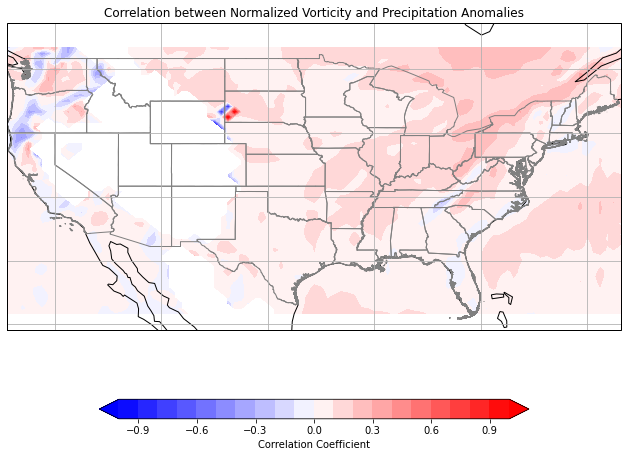

In [28]:
clevs=np.arange(-1,1.1,0.1)

fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Add cyclic point
data=corr_map
#data,lon=add_cyclic_point(r_map,coord=data_lon)

# Make a filled contour plot
cs=ax.contourf(corr_map['lon'],corr_map['lat'],
            data,clevs,
            transform=ccrs.PlateCarree(),
            cmap='bwr',extend='both')

# Add coastlines
ax.coastlines()

# Add gridlines
ax.gridlines()
ax.set_extent([-124.5,-66.8,23.486,49])
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')

# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Correlation Coefficient')

# Add title
plt.title('Correlation between Normalized Vorticity and Precipitation Anomalies')
plt.savefig('/homes/areed29/CLIM997/summer22_research/corrmap_vort_precip_anoms')

### Lagged Correlation

In [29]:
corr_map_lagged=xr.corr(precip_concat_sorted,new_lagged,dim='time')
print(corr_map_lagged)

<xarray.DataArray '__xarray_dataarray_variable__' (lat: 52, lon: 106)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan, 0.00776329, 0.00906278, ..., 0.05117971, 0.05451243,
        0.03881787],
       [       nan, 0.0132532 , 0.02287067, ..., 0.04796493, 0.10175675,
        0.05988952],
       ...,
       [       nan, 0.24410798, 0.18261389, ..., 0.0435155 , 0.03395813,
        0.04794739],
       [       nan, 0.18646866, 0.15300951, ..., 0.02538424, 0.02183067,
        0.02885062],
       [       nan, 0.09648617, 0.03765647, ..., 0.01826134, 0.02637947,
        0.03962095]])
Coordinates:
  * lat      (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 48.0 48.5 49.0 49.5 50.0
  * lon      (lon) float64 -126.2 -125.6 -125.0 -124.4 ... -61.88 -61.25 -60.62


/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


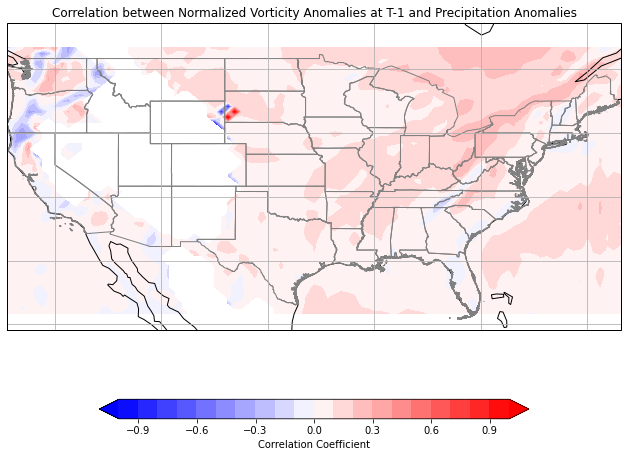

In [30]:
clevs=np.arange(-1,1.1,0.1)

fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Add cyclic point
data=corr_map_lagged
#data,lon=add_cyclic_point(r_map,coord=data_lon)

# Make a filled contour plot
cs=ax.contourf(corr_map_lagged['lon'],corr_map_lagged['lat'],
            data,clevs,
            transform=ccrs.PlateCarree(),
            cmap='bwr',extend='both')

# Add coastlines
ax.coastlines()

# Add gridlines
ax.gridlines()
ax.set_extent([-124.5,-66.8,23.486,49])
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')

# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Correlation Coefficient')

# Add title
plt.title('Correlation between Normalized Vorticity Anomalies at T-1 and Precipitation Anomalies')
plt.savefig('/homes/areed29/CLIM997/summer22_research/corrmap_vort_precip_anoms_lagged')

In [41]:
vort_6z_corr=vort_concat_sorted.isel(time=vort_concat_sorted.time.dt.hour.isin([18]))
precip_6z_corr=precip_concat_sorted.isel(time=precip_concat_sorted.time.dt.hour.isin([18]))

In [42]:
'''
vort_6z_corr=vort_concat_sorted.isel(time=vort_concat_sorted.time.dt.hour.isin([6]))
empty_vort_correcttimes=vort_6z_corr-vort_6z_corr
empty_vort_correcttimes
'''

'\nvort_6z_corr=vort_concat_sorted.isel(time=vort_concat_sorted.time.dt.hour.isin([6]))\nempty_vort_correcttimes=vort_6z_corr-vort_6z_corr\nempty_vort_correcttimes\n'

In [43]:
### Creating lag manually (precip anoms at 6z with vorticity anoms at 00z )
corr_map_individual=xr.corr(precip_6z_corr,vort_6z_corr,dim='time')
corr_map_individual

<xarray.DataArray '__xarray_dataarray_variable__' (lat: 52, lon: 106)>
array([[            nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
...
         1.67793883e-01,  1.54575112e-01,  1.47585886e-01,
         1.52389577e-01,  1.32946021e-01,  1.17134028e-01,
         1.34190594e-01,  1.34830233e-01,  1.33884283e-01,
         1.48545562e-01,  1.61370427e-01,  1.70091045e-01,
         1.88772784e-01,  2.02855232e-01,  1.90438510e-01,
         1.48463462e-01,  1.19314173e-01,  1.37236251e-01,
         1.70389253e-01,  1.96862386e-01,  2.12493812e-01,
         2.21362715e-01,  2.31548101e-01,  2.55056929e-01,
         2.64876304e-01,  2.66051884e-01,  2.70481090e-01,
         2.70974177e-01,  2.73932125e-01,  2.82319626e-01,
         2.95388000e-01,  3.04105576e-01,  3.09664066e-01,
         3.06584883e-01,  3.05043213e-01,  2.77655330e-01,
         2.22881554e-01,  1.95342328e-01,  1.83719357e-01,
         2.05482210e-01,  1.81422600e-01,  1.51483124e-01,
         1.30251340e-01,  6.30488837e-02, -2.19722925e-02,
        -9.57499664e-02, -1.78088420e-02,  7.52729363e-02,
         1.03084338e-01,  7.92306992e-02,  5.56920819e-02,
         4.11464245e-02,  2.48678801e-02,  1.08401000e-02,
         9.55757963e-03,  3.39651401e-02,  4.82121793e-02,
         6.90246646e-02]])
Coordinates:
  * lat      (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 48.0 48.5 49.0 49.5 50.0
  * lon      (lon) float64 -126.2 -125.6 -125.0 -124.4 ... -61.88 -61.25 -60.62

In [44]:
print(np.nanmax(corr_map_individual))

0.9307807376283249


/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


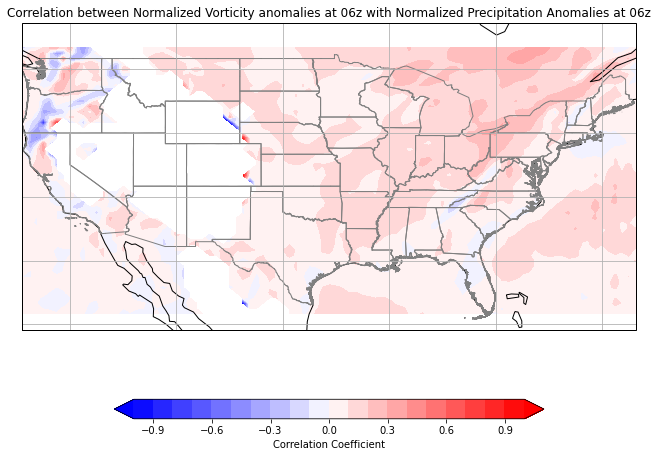

In [45]:
clevs=np.arange(-1,1.1,0.1)

fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Add cyclic point
data=corr_map_individual
#data,lon=add_cyclic_point(r_map,coord=data_lon)

# Make a filled contour plot
cs=ax.contourf(corr_map_individual['lon'],corr_map_individual['lat'],
            data,clevs,
            transform=ccrs.PlateCarree(),
            cmap='bwr',extend='both')

# Add coastlines
ax.coastlines()

# Add gridlines
ax.gridlines()
ax.set_extent([-124.5,-66.8,23.486,49])
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')

# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Correlation Coefficient')

# Add title
plt.title('Correlation between Normalized Vorticity anomalies at 06z with Normalized Precipitation Anomalies at 06z')
plt.savefig('/homes/areed29/CLIM997/summer22_research/corrmap_vort_precip_anoms_individual_lagged')

In [35]:
dc_precip=precip_06z.sel(lat=39,lon=-77,method='nearest')
dc_vort=vort_00z.sel(lat=39,lon=-77,method='nearest')

In [36]:
dc_vort_unlagged=vort_06z.sel(lat=39,lon=-77,method='nearest')

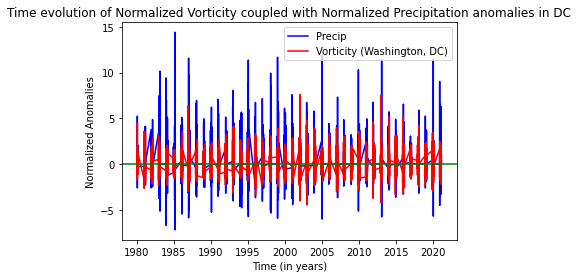

In [37]:
#DC time series lagged

plt.plot(dc_precip['time'],dc_precip,'b')
plt.plot(dc_vort['time'],dc_vort,'r')
plt.legend(['Precip','Vorticity (Washington, DC)'])
plt.axhline(y=0.0, color='g', linestyle='-')
plt.xlabel('Time (in years)')
plt.ylabel('Normalized Anomalies')
plt.title('Time evolution of Normalized Vorticity coupled with Normalized Precipitation anomalies in DC')
plt.savefig('/homes/areed29/CLIM997/summer22_research/washington_vortanoms_corr',bbox_inches='tight')

In [69]:
#Pick Central Park
nyc_precip=precip_06z.sel(lat=40.78,lon=-73.97,method='nearest')
nyc_vort=vort_00z.sel(lat=40.78,lon=-73.97,method='nearest')
nyc_vort_unlagged=vort_06z.sel(lat=40.78,lon=-73.97, method='nearest')

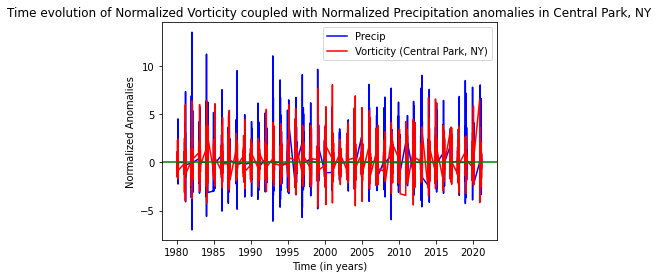

In [64]:
#NYC time series lagged

plt.plot(nyc_precip['time'],nyc_precip,'b')
plt.plot(nyc_vort['time'],nyc_vort,'r')
plt.legend(['Precip','Vorticity (Central Park, NY)'])
plt.axhline(y=0.0, color='g', linestyle='-')
plt.xlabel('Time (in years)')
plt.ylabel('Normalized Anomalies')
plt.title('Time evolution of Normalized Vorticity coupled with Normalized Precipitation anomalies in Central Park, NY')
plt.savefig('/homes/areed29/CLIM997/summer22_research/nyc_vortanoms_corr',bbox_inches='tight')

In [65]:
#central park
nyc_precip_nonans=nyc_precip.dropna(dim='time')
nyc_vort_nonans=nyc_vort.dropna(dim='time')
R_nyc=np.corrcoef(nyc_precip_nonans,nyc_vort_nonans)# Calculates the correlation coefficient based on the covariance matrix
R_nyc #lagged array
corr_nyc=R_nyc[0,1]
corr_nyc

-0.15280804679495755

In [66]:
dc_precip_nonans=dc_precip.dropna(dim='time')
dc_vort_nonans=dc_vort.dropna(dim='time')

In [67]:
R=np.corrcoef(dc_precip_nonans,dc_vort_nonans)# Calculates the correlation coefficient based on the covariance matrix
R #lagged array

array([[ 1.        , -0.10592556],
       [-0.10592556,  1.        ]])

In [68]:
corr=R[0,1]
corr

-0.10592556385945895

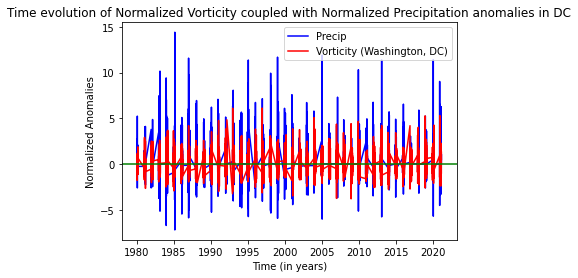

In [41]:
#DC time series unlagged

plt.plot(dc_precip['time'],dc_precip,'b')
plt.plot(dc_vort_unlagged['time'],dc_vort_unlagged,'r')
plt.legend(['Precip','Vorticity (Washington, DC)'])
plt.xlabel('Time (in years)')
plt.ylabel('Normalized Anomalies')
plt.axhline(y=0.0, color='g', linestyle='-')
plt.title('Time evolution of Normalized Vorticity coupled with Normalized Precipitation anomalies in DC')
plt.savefig('/homes/areed29/CLIM997/summer22_research/washington_vortanoms_corr_unlagged',bbox_inches='tight')

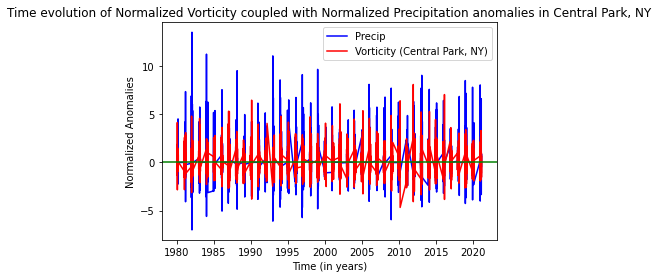

In [70]:
#NYC time series unlagged

plt.plot(nyc_precip['time'],nyc_precip,'b')
plt.plot(nyc_vort_unlagged['time'],nyc_vort_unlagged,'r')
plt.legend(['Precip','Vorticity (Central Park, NY)'])
plt.axhline(y=0.0, color='g', linestyle='-')
plt.xlabel('Time (in years)')
plt.ylabel('Normalized Anomalies')
plt.title('Time evolution of Normalized Vorticity coupled with Normalized Precipitation anomalies in Central Park, NY')
plt.savefig('/homes/areed29/CLIM997/summer22_research/nyc_vortanoms_corr_unlagged',bbox_inches='tight')

In [71]:
dc_vort_unlagged_nonans=dc_vort_unlagged.dropna(dim='time')
nyc_vort_unlagged_nonans=nyc_vort_unlagged.dropna(dim='time')

In [72]:
#CENTRAL PARK
R_nyc_unlagged=np.corrcoef(nyc_precip_nonans,nyc_vort_unlagged_nonans)# Calculates the correlation coefficient based on the covariance matrix
R_nyc_unlagged #lagged array
corr_nyc_unlagged=R_nyc_unlagged[0,1]
corr_nyc_unlagged

-0.05787496995683539

In [ ]:
#WASHINGTON DC

In [43]:
R=np.corrcoef(dc_precip_nonans,dc_vort_unlagged_nonans)# Calculates the correlation coefficient based on the covariance matrix
R #lagged array

array([[1.        , 0.01587092],
       [0.01587092, 1.        ]])

In [44]:
corr=R[0,1]
corr

0.015870920683302772

In [45]:
### Regression analysis
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(dc_precip_nonans, dc_vort_nonans)
slope,intercept,r_value,p_value, std_err

(-0.06927016105213533,
 -0.00023275130129029518,
 -0.10592556385945893,
 7.531849609532459e-11,
 0.01061041592221711)

In [46]:
rsq=r_value**2
rsq

0.011220225078944313

Text(0.5, 1.0, 'Precip anomalies regressed onto vorticity anomalies with lag')

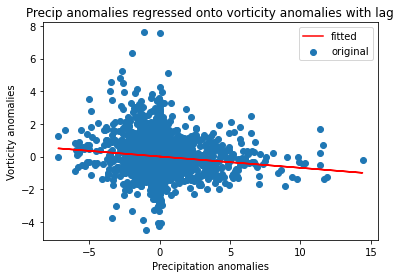

In [47]:
plt.scatter(dc_precip_nonans, dc_vort_nonans)
plt.plot(dc_precip_nonans, intercept + slope*dc_precip_nonans, 'r')
plt.legend(['fitted','original'])
plt.xlabel('Precipitation anomalies')
plt.ylabel('Vorticity anomalies')
plt.title('Precip anomalies regressed onto vorticity anomalies with lag')

In [48]:
slope, intercept, r_value, p_value, std_err = linregress(dc_precip_nonans, dc_vort_unlagged_nonans)
slope,intercept,r_value,p_value, std_err

(0.010553629844871508,
 -1.0748026670450908e-05,
 0.015870920683302772,
 0.3307197486450345,
 0.010848813453019834)

In [49]:
rsq=r_value**2
rsq

0.00025188612333568774

Text(0.5, 1.0, 'Precip anomalies regressed onto vorticity anomalies without lag')

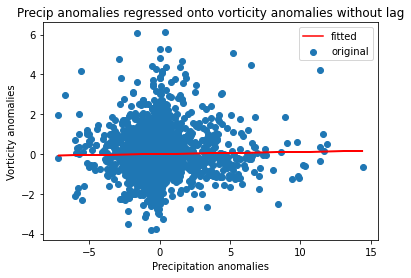

In [50]:
plt.scatter(dc_precip_nonans, dc_vort_unlagged_nonans)
plt.plot(dc_precip_nonans, intercept + slope*dc_precip_nonans, 'r')
plt.legend(['fitted','original'])
plt.xlabel('Precipitation anomalies')
plt.ylabel('Vorticity anomalies')
plt.title('Precip anomalies regressed onto vorticity anomalies without lag')

In [52]:
#Mann Kendell test for nonparametric trends
mk.original_test(dc_precip)

Mann_Kendall_Test(trend='no trend', h=False, p=0.07103709347089038, z=1.8052402597178652, Tau=0.01964132094456146, s=138656.0, var_s=5899307707.333333, slope=1.1631888667867978e-07, intercept=-0.000892554971565016)

In [53]:
mk.original_test(dc_vort) #06z

Mann_Kendall_Test(trend='no trend', h=False, p=0.81780444661616, z=-0.23036977372519069, Tau=-0.002506585896852751, s=-17695.0, var_s=5899307773.666667, slope=-3.136851622850454e-06, intercept=-0.06077744490081224)

In [54]:
mk.original_test(dc_vort_unlagged) #0z

Mann_Kendall_Test(trend='no trend', h=False, p=0.8216102513352883, z=-0.22547438348439314, Tau=-0.002453323602576592, s=-17319.0, var_s=5899307773.666667, slope=-3.0607573990873076e-06, intercept=-0.06394294361974422)

In [57]:
dc_precip_0=precip_00z.sel(lat=39,lon=-77,method='nearest')
dc_precip_12=precip_12z.sel(lat=39,lon=-77,method='nearest')
dc_precip_18=precip_18z.sel(lat=39,lon=-77,method='nearest')
dc_vort_12=vort_12z.sel(lat=39,lon=-77,method='nearest')
dc_vort_18=vort_18z.sel(lat=39,lon=-77,method='nearest')

In [58]:
mk.original_test(dc_precip_0)

Mann_Kendall_Test(trend='no trend', h=False, p=0.4205612392254676, z=-0.8054479357947165, Tau=-0.008763488923921753, s=-61865.0, var_s=5899307695.666667, slope=-5.401256402827284e-09, intercept=-0.0003700483740207913)

In [59]:
mk.original_test(dc_precip_12)

Mann_Kendall_Test(trend='no trend', h=False, p=0.560037505732526, z=-0.5827857994241091, Tau=-0.006340904464584328, s=-44763.0, var_s=5899307632.333333, slope=-7.001437640587702e-09, intercept=-0.0006056083876619848)

In [60]:
mk.original_test(dc_precip_18)

Mann_Kendall_Test(trend='no trend', h=False, p=0.05327443836200918, z=-1.932689671108935, Tau=-0.021027982111235185, s=-148445.0, var_s=5899307653.0, slope=-1.2350694544704287e-07, intercept=-0.0003682693634752641)

In [61]:
mk.original_test(dc_vort_12)

Mann_Kendall_Test(trend='no trend', h=False, p=0.9600014924051772, z=-0.05015171065838332, Tau=-0.0005457968612926617, s=-3853.0, var_s=5899307773.666667, slope=-7.093345588199272e-07, intercept=-0.07703632117177067)

In [62]:
mk.original_test(dc_vort_18)

Mann_Kendall_Test(trend='no trend', h=False, p=0.7969916997576862, z=-0.2572423414299942, Tau=-0.0027989618952197516, s=-19759.0, var_s=5899307773.666667, slope=-3.3607523792527324e-06, intercept=-0.03940135006233459)